# Projeto do Módulo Técnicas de Programação I

**Integrantes**

*   César Sánchez
*   João Costa
*   Marcos Vinícius
*   Martha Lioy
*   Vinícius Oliveira

**Dataset**

O dataset escolhido foi Brazilian E-Commerce Public Dataset by Olist, feito por Olist Store e publicado em https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce.


**Perguntas de Negócio**

Conforme os dados contidos nos datasets de e-commerce da Olist do periodo de 2016 a 2018:

1.   Quais foram as cidades com mais vendedores?
2.   Qual cidades foram campeãs de compras?
3.   Qual cidades foram campeãs de vendas?
4.   Quais foram as categorias de produtos mais vendidas?
5.   Quais foram as formas de pagamento mais utilizadas?
6.   Qual foi o montante de vendas anual para os 5 estados com melhor desempenho?
7.   Em que ano as vendas na modalide foram maiores?
8.  Quais foram os produtos com melhor desempenho?
9.  Como se distribuem as compras no Brasil?
10.  Qual foi a quantidade de clientes por cada Estado?


In [11]:
#IMPORTANDO DATASETS

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale

#Order Items Dataset
order_items_rota = '/content/Datasets/olist_order_items_dataset.csv'
order_items_df = pd.read_csv(order_items_rota)

#Orders Dataset
orders_dataset_rota = '/content/Datasets/olist_orders_dataset.csv'
orders_dataset_df = pd.read_csv(orders_dataset_rota)

#Customers Dataset
customers_dataset_rota = '/content/Datasets/olist_customers_dataset.csv'
customers_dataset_df = pd.read_csv(customers_dataset_rota)

#Payment Dataset
payment_dataset_rota = '/content/Datasets/olist_order_payments_dataset.csv'
payment_dataset_df = pd.read_csv(payment_dataset_rota)

#Products Dataset
products_dataset_rota = '/content/Datasets/olist_products_dataset.csv'
products_dataset_df = pd.read_csv(products_dataset_rota)

#Sellers Dataset
sellers_dataset_rota = '/content/Datasets/olist_sellers_dataset.csv'
sellers_dataset_df = pd.read_csv(sellers_dataset_rota)

Text(0, 0.5, 'Cidade')

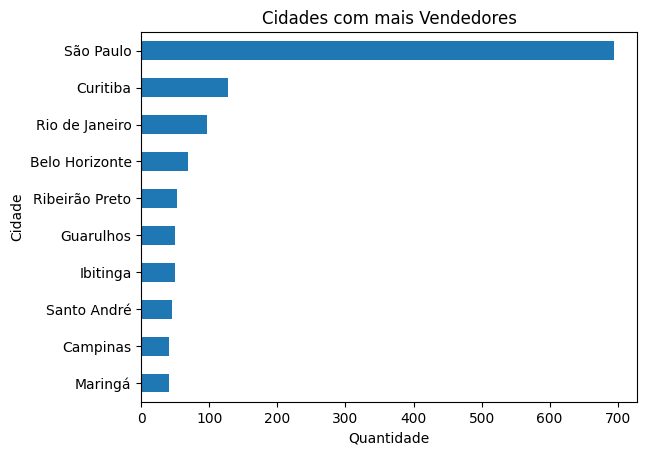

In [ ]:
#1.   Quais foram as cidades com mais vendedores?

#Mapear os nomes das cidades
nomes_cidades = {
    'sao paulo': 'São Paulo',
    'curitiba': 'Curitiba',
    'rio de janeiro': 'Rio de Janeiro',
    'belo horizonte': 'Belo Horizonte',
    'ribeirao preto': 'Ribeirão Preto',
    'guarulhos': 'Guarulhos',
    'ibitinga': 'Ibitinga',
    'santo andre': 'Santo André',
    'campinas': 'Campinas',
    'maringa': 'Maringá'
}

#Calcular a frequência das ocorrências
top_10 = sellers_dataset_df['seller_city'].value_counts().head(10)

# Mudar os nomes das cidades
top_10 = top_10.rename(index=nomes_cidades)

#Ordenar as cidades por frequência
top_10.sort_values(ascending=True).plot(kind='barh')

#Plotar os dados
plt.title('Cidades com mais Vendedores')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')

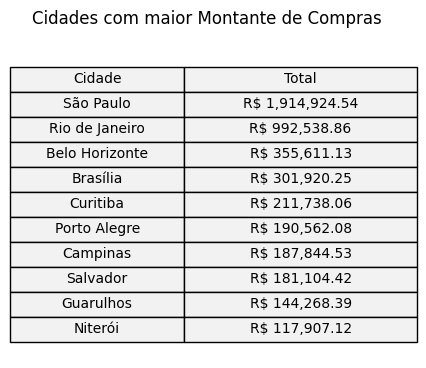

In [ ]:
#2.   Quais cidades foram campeãs de compras?

#Merge de Orders com Customers para obter compras por cidade
orders_city_df= orders_dataset_df.merge(customers_dataset_df, how='left', on='customer_id')

#Merge com Orders Items para obter volume de compras por cidade
orders_items_city_df = order_items_df.merge(orders_city_df, how='left', on='order_id')

#Obter o montante de compras por cidade
total_buy_city = orders_items_city_df.groupby('customer_city')['price'].sum().reset_index()
total_buy_city_sorted = total_buy_city.sort_values(by='price', ascending=False)

#Mapear os nomes das cidades
nomes_cidades = {
    'sao paulo': 'São Paulo',
    'rio de janeiro': 'Rio de Janeiro',
    'belo horizonte': 'Belo Horizonte',
    'brasilia': 'Brasília',
    'curitiba': 'Curitiba',
    'porto alegre': 'Porto Alegre',
    'campinas': 'Campinas',
    'salvador': 'Salvador',
    'guarulhos': 'Guarulhos',
    'niteroi': 'Niterói',
    'goiania': 'Goiania'
}

total_buy_city_sorted['customer_city'] = total_buy_city_sorted['customer_city'].map(nomes_cidades)
total_buy_city_sorted.head(10)

# Criar figura
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('Cidades com maior Montante de Compras', fontsize=12)

# Criar tabela
table_data = [['Cidade', 'Total']] + [[cidade, f'R$ {total:,.2f}'] for cidade, total in zip(total_buy_city_sorted.head(10)['customer_city'], total_buy_city_sorted.head(10)['price'])]
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.3, 0.4], edges='closed', cellColours=[['#f2f2f2']*2] * len(table_data), colLabels=None)
table.auto_set_font_size(True)
table.set_fontsize(10)
table.scale(1.5, 1.5)
ax.axis('off')


# Mostrar a figura
plt.show()

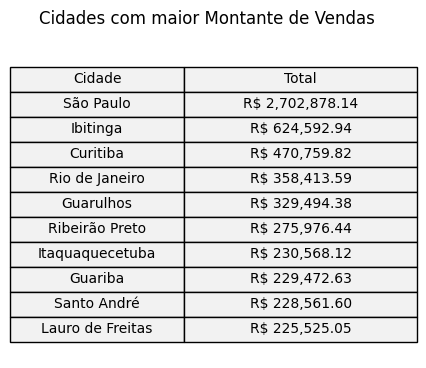

In [ ]:
#3.   Quais cidades foram campeãs de vendas?

#Merge de Orders Items com Sellers para obter vendas por cidade
orders_city_sell_df= order_items_df.merge(sellers_dataset_df, how='left', on='seller_id')

#Obter o montante de vendas por cidade
total_sell_city = orders_city_sell_df.groupby('seller_city')['price'].sum().reset_index()
total_sell_city_sorted = total_sell_city.sort_values(by='price', ascending=False)

#Mapear os nomes das cidades
nomes_cidades = {
    'sao paulo': 'São Paulo',
    'ibitinga': 'Ibitinga',
    'curitiba': 'Curitiba',
    'rio de janeiro': 'Rio de Janeiro',
    'guarulhos': 'Guarulhos',
    'ribeirao preto': 'Ribeirão Preto',
    'itaquaquecetuba': 'Itaquaquecetuba',
    'guariba': 'Guariba',
    'santo andre': 'Santo André',
    'lauro de freitas': 'Lauro de Freitas',
    'piracicaba':'Piracicaba'
}

total_sell_city_sorted['seller_city'] = total_sell_city_sorted['seller_city'].map(nomes_cidades)
total_sell_city_sorted.head(10)

# Criar figura
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('Cidades com maior Montante de Vendas', fontsize=12)

# Criar tabela
table_data = [['Cidade', 'Total']] + [[cidade, f'R$ {total:,.2f}'] for cidade, total in zip(total_sell_city_sorted.head(10)['seller_city'], total_sell_city_sorted.head(10)['price'])]
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.3, 0.4], edges='closed', cellColours=[['#f2f2f2']*2] * len(table_data), colLabels=None)
table.auto_set_font_size(True)
table.set_fontsize(10)
table.scale(1.5, 1.5)
ax.axis('off')


# Mostrar a figura
plt.show()

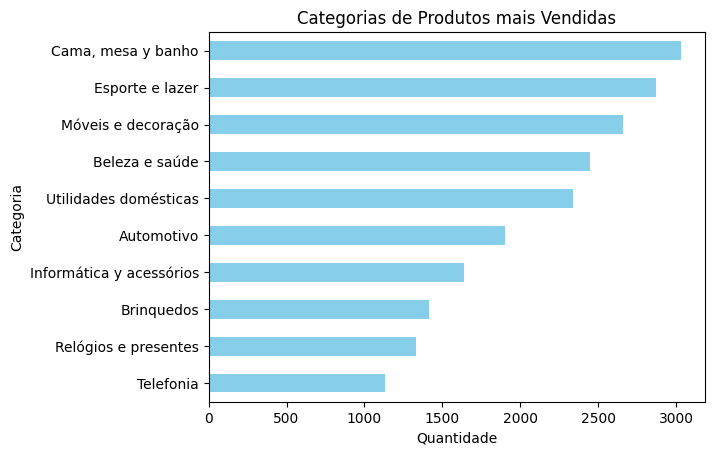

In [ ]:
#4.   Quais foram as categorias de produtos mais vendidas?

# Mapear os nomes das categorías
nomes_categorias = {
    'cama_mesa_banho': 'Cama, mesa y banho',
    'esporte_lazer': 'Esporte e lazer',
    'moveis_decoracao': 'Móveis e decoração',
    'beleza_saude': 'Beleza e saúde',
    'utilidades_domesticas': 'Utilidades domésticas',
    'automotivo': 'Automotivo',
    'informatica_acessorios': 'Informática y acessórios',
    'brinquedos': 'Brinquedos',
    'relogios_presentes': 'Relógios e presentes',
    'telefonia': 'Telefonia'
}

#Calcular a frequência das ocorrências
categoria = products_dataset_df['product_category_name'].value_counts()

# Mudar os nomes das categorías
categoria = categoria.rename(index=nomes_categorias)

#Organizar as categorias por frequência
categoria = categoria.head(10).sort_values(ascending=True)

# Plotar os dados
categoria.plot(kind='barh', color='skyblue')
plt.title('Categorias de Produtos mais Vendidas')
plt.xlabel('Quantidade')
plt.ylabel('Categoria')

plt.show()

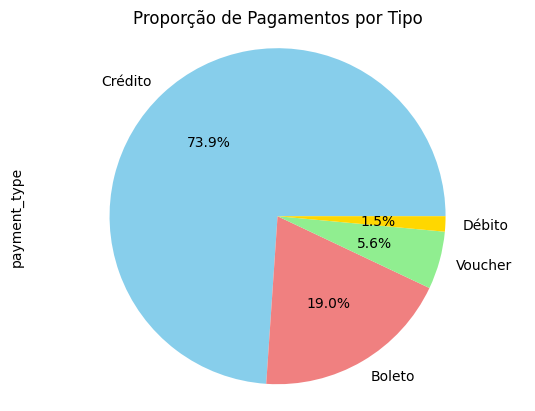

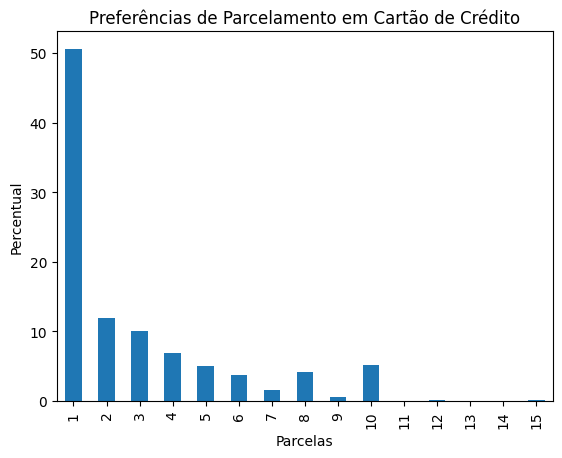

In [ ]:
#5.   Quais foram as formas de pagamento mais utilizadas? (Gráfico Circular)

# Contar a frequência dos tipos de pagamento
contagem_tipos_pagamento = payment_dataset_df['payment_type'].value_counts()

# Mapear os nomes das categorías
nomes_categorias = {
    'credit_card': 'Crédito',
    'boleto': 'Boleto',
    'voucher': 'Voucher',
    'debit_card': 'Débito',
    'not_defined': 'ND'
}

# Mudar os nomes das categorías
contagem_tipos_pagamento = contagem_tipos_pagamento.rename(index=nomes_categorias)

contagem_tipos_pagamento = contagem_tipos_pagamento[contagem_tipos_pagamento.index != 'ND']

# Plotar um gráfico circular
contagem_tipos_pagamento.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Proporção de Pagamentos por Tipo')
plt.axis('equal')
plt.show()

print()

# Calcular preferências de parcelamento em cartão de crédito
percentual = (payment_dataset_df['payment_installments'].value_counts(normalize=True) * 100).round(2)

# Filtrar os dados para incluir valores maiores a 0 e até 15 parcelas
percentual = percentual[(percentual.index > 0) & (percentual.index <= 15)]

# Ordenar o índice
percentual = percentual.sort_index()

# Plotar o gráfico de barras
percentual.plot(kind='bar')
plt.title('Preferências de Parcelamento em Cartão de Crédito')
plt.ylabel('Percentual')
plt.xlabel('Parcelas')
plt.show()

<Figure size 1200x600 with 0 Axes>

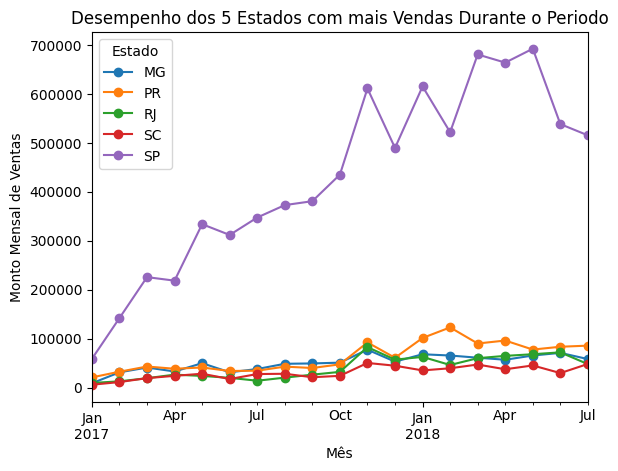

In [ ]:
#6.   Qual foi o montante de vendas anual para os 5 estados com melhor desempenho?

#Merge de Orders Items com Sellers para obter vendas por estado
orders_state_sell_df= order_items_df.merge(sellers_dataset_df, how='left', on='seller_id')
orders_state_sell_df.head()

#Merge com Orders para obter as datas em que as vendas foram aprovadas
orders_items_state_sell_date_df = orders_state_sell_df.merge(orders_dataset_df, how='left', on='order_id')

# Transformar coluna order_approved_at a datetime
orders_items_state_sell_date_df['order_approved_at'] = pd.to_datetime(orders_items_state_sell_date_df['order_approved_at'])

# Filtrar o período de jan/2017 a jul/2018
filtered_data = orders_items_state_sell_date_df[(orders_items_state_sell_date_df['order_approved_at'] >= '2017-01-01') & (orders_items_state_sell_date_df['order_approved_at'] <= '2018-07-31')]

# Agrupar por estado e mês, somando o montante mensal
sell_state_month = filtered_data.groupby(['seller_state', filtered_data['order_approved_at'].dt.to_period("M")])['price'].sum().reset_index()

# Obter os 5 estados con melhor desempenho de vendas
top_5_states = sell_state_month.groupby('seller_state')['price'].sum().nlargest(5).index

# Filtrar os dados dos 5 melhores
sell_top_5_states = sell_state_month[sell_state_month['seller_state'].isin(top_5_states)]

# Pivotar a tabela para obter os estados como colunas e os meses como índice
sell_top_5_states_pivot = sell_top_5_states.pivot(index='order_approved_at', columns='seller_state', values='price')

# Plotar o resultado
plt.figure(figsize=(12, 6))
sell_top_5_states_pivot.plot.line(marker='o')
plt.title('Desempenho dos 5 Estados com mais Vendas Durante o Periodo')
plt.xlabel('Mês')
plt.ylabel('Monto Mensal de Ventas')
plt.legend(title='Estado', loc='upper left')
plt.show()

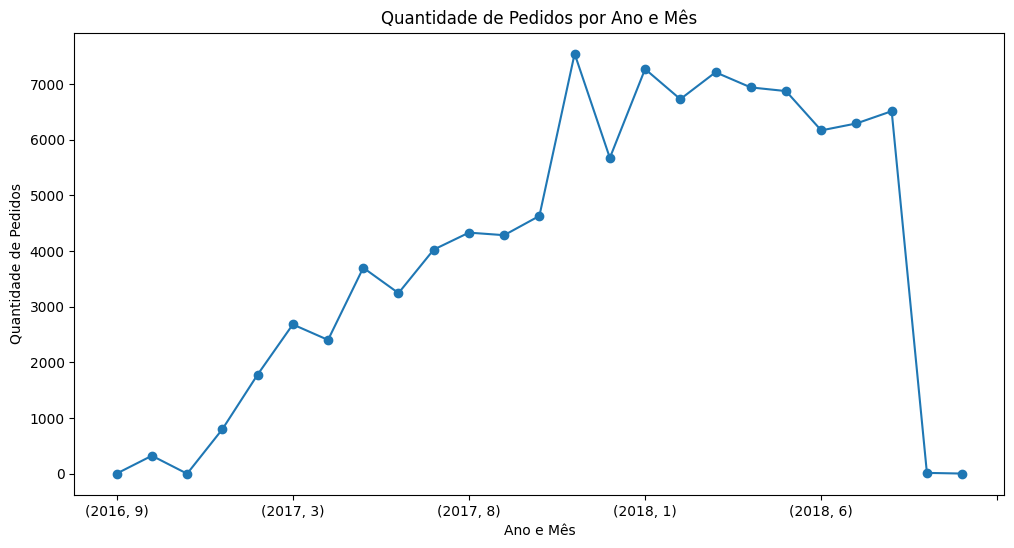

In [6]:
#7.   Em que ano as vendas na modalide foram maiores?

# Converter a coluna 'order_purchase_timestamp' para datetime
orders_dataset_df['order_purchase_timestamp'] = pd.to_datetime(orders_dataset_df['order_purchase_timestamp'])



# Criar colunas para ano e mês
orders_dataset_df['ano'] = orders_dataset_df['order_purchase_timestamp'].dt.year
orders_dataset_df['mes'] = orders_dataset_df['order_purchase_timestamp'].dt.month

# Contar a quantidade de pedidos por ano e mês
quantidade_pedidos = orders_dataset_df.groupby(['ano', 'mes']).size()

# Aumentar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar o gráfico de linhas
quantidade_pedidos.plot.line(marker='o')
plt.title('Quantidade de Pedidos por Ano e Mês')
plt.xlabel('Ano e Mês')
plt.ylabel('Quantidade de Pedidos')

plt.show()

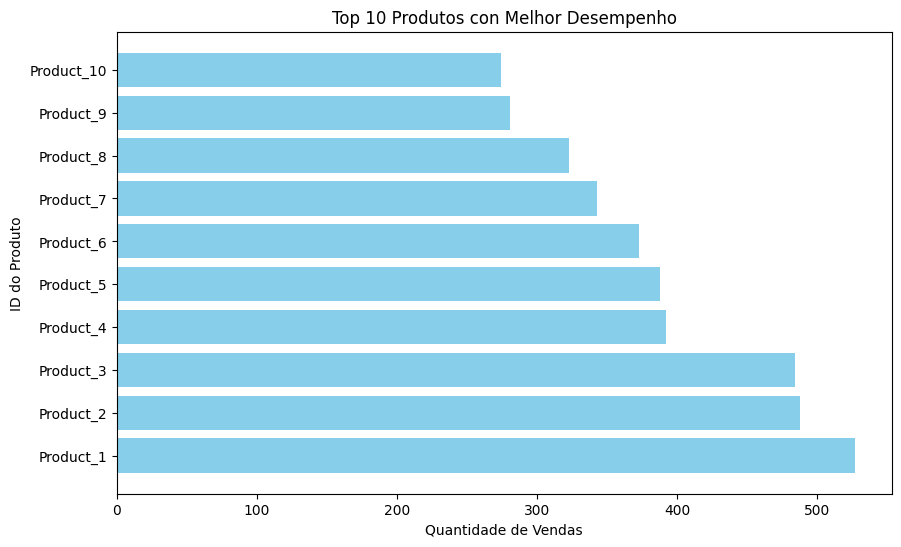

In [32]:
#8.  Quais foram os produtos com melhor desempenho?

#Contar a frequência de venda dos produtos
product_sales = order_items_df.groupby('product_id').size().reset_index(name='quantidade_vendas')

#Ordenar dos mais aos menos vendidos
product_sales_sorted = product_sales.sort_values(by='quantidade_vendas', ascending=False)
product_sales_sorted.head(10)

# Tomar os 10 productos mais vendidos
top_10_products = product_sales_sorted.head(10)
top_10_products = top_10_products.copy()

# Trocar os nomes dos produtos
top_10_products['product_id'] = ['Product_' + str(i) for i in range(1, 11)]

# Criar um gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_products['product_id'], top_10_products['quantidade_vendas'], color='skyblue')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('ID do Produto')
plt.title('Top 10 Produtos con Melhor Desempenho')
plt.show()

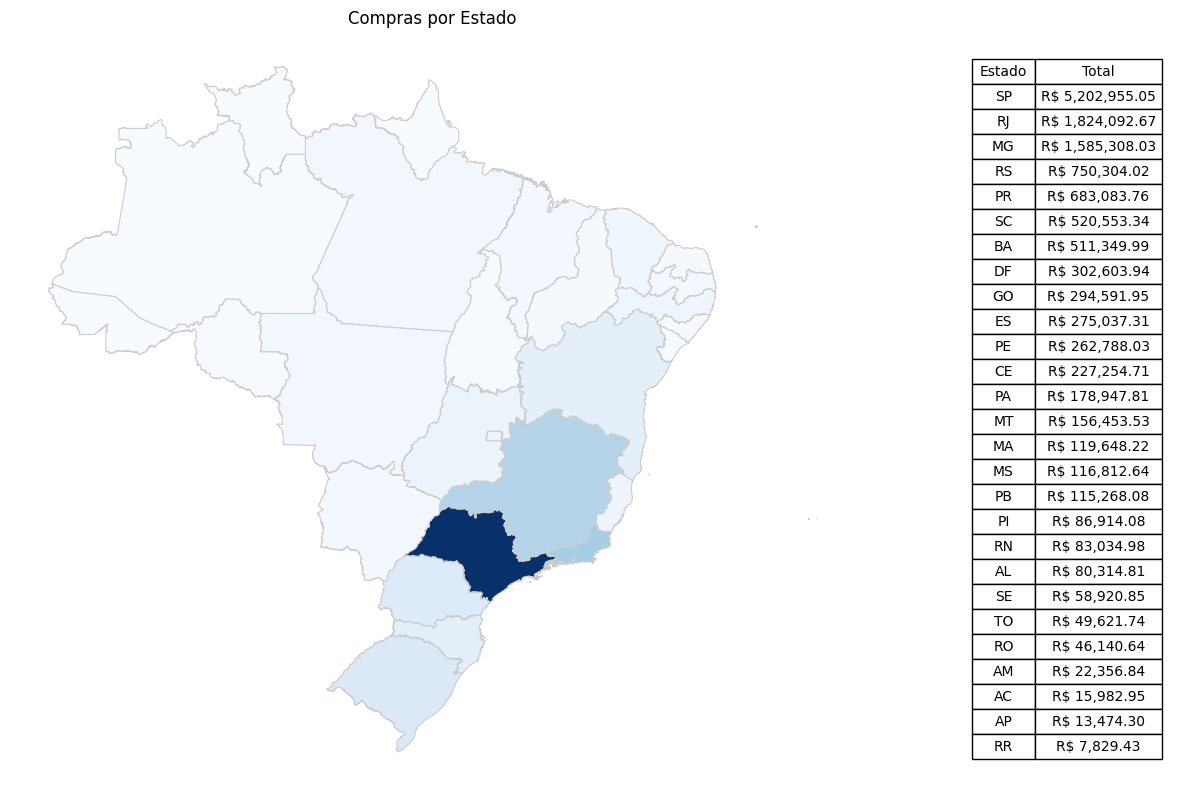

In [ ]:
#9.  Como se distribuem as compras no Brasil? (Mapa Cloroplético)

#Merge de Orders com Customers para obter compras por estado
orders_state_df= orders_dataset_df.merge(customers_dataset_df, how='left', on='customer_id')
orders_state_df.head()

#Merge com Orders Items para obter volume de compras por estado

orders_items_state_df = order_items_df.merge(orders_state_df, how='left', on='order_id')
orders_items_state_df.head()

#Obter o montante de compras por Estado

total_buy_state = orders_items_state_df.groupby('customer_state')['price'].sum().reset_index()

#REALIZAR MAPA COROPLÉTICO

#Importar arquivo Shape
shape_file_rota = '/content/Files/BR_UF_2021.shp'
mapa_brasil = gpd.read_file(shape_file_rota)

#Unir o dataframe com o arquivo shape
merged_map = mapa_brasil.set_index('SIGLA').join(total_buy_state.set_index('customer_state'))

#Ordenar os valores de forma descendente
sorted_map = merged_map.sort_values(by='price', ascending=False)

#Configurar o gráfico
fig, ax = plt.subplots(1, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [4, 1]})
ax[0].set_title('Compras por Estado')
sorted_map.plot(column='price', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=False)
ax[0].set_axis_off()

#Criar tabela com datos
table_data = [['Estado', 'Total']] + [[estado, f'R$ {total:,.2f}'] for estado, total in zip(sorted_map.index, sorted_map['price'])]
table = ax[1].table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.3, 0.6], edges='closed')
ax[1].set_axis_off()

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.show()

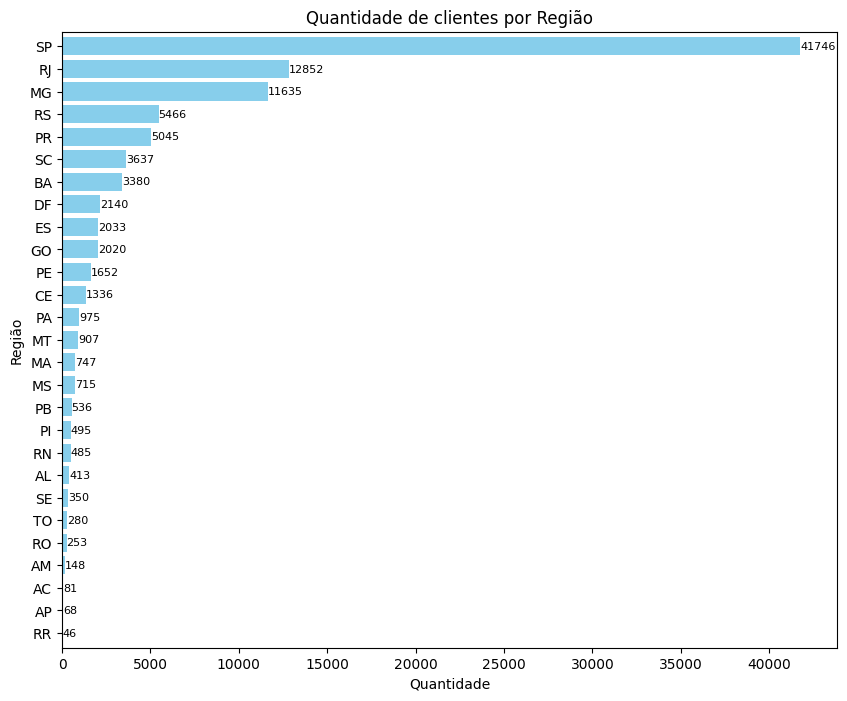

In [33]:
#10.  Qual foi a quantidade de clientes por cada Estado?

# Contar a quantidade de clientes por estados
regiao = customers_dataset_df['customer_state'].value_counts()

# Reordenar o DataFrame pelo número de ocorrências em ordem decrescente
regiao = regiao.sort_values(ascending=True)

# Ajustar o gráfico
fig, ax = plt.subplots(figsize=(10, 8))
regiao.plot(kind='barh', color='skyblue', width=0.8)
plt.title('Quantidade de clientes por Região')
plt.xlabel('Quantidade')
plt.ylabel('Região')

# Rótulos de dados nas barras com tamanho de fonte reduzido (por exemplo, fontsize=8)
for i, valor in enumerate(regiao):
    plt.text(valor + 0.1, i, str(valor), ha='left', va='center', fontsize=8)

plt.show()